# Load packages

In [1]:
import scanpy as sc
import DrivAER as dv
import pandas as pd
import numpy as np
import anndata as ad

C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\scanpy\api\__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning
Using TensorFlow backend.
W1121 17:04:04.476480 17208 deprecation_wrapper.py:119] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\kopt-0.1.0-py3.7.egg\kopt\config.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


## Erythrocyte trajectory

In [4]:
count1 = sc.read("DrivAER/data/Paul_Ery.txt",sep="\t",first_column_names=True,cache=True)
count1.raw= count1
pt1 = pd.to_numeric(count1.obs_names)
C3_mouse = dv.get_anno(filename="C3.gmt",filetype="gmt",conv_mouse=True)

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [112]:
adata=ad.AnnData(count1.raw.X)
sc.pp.normalize_per_cell(adata)
adata.var_names = count1.var_names
sc.pp.log1p(adata)
sc.pp.scale(adata)


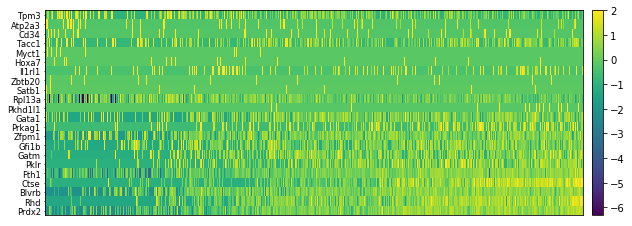

GridSpec(3, 3, height_ratios=[0, 3.96, 0], width_ratios=[10, 0, 0.2])

In [114]:
genes=C3_mouse["GATA_C"]
genes = list(set(genes).intersection(set(adata.var_names)))

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(adata[:,genes].X.T)

order = sorted(range(len(principalComponents)), key=lambda k: principalComponents[k])
genes = [genes[i] for i in order]

order_cols = sorted(range(len(pt1)), key=lambda k: pt1[k])
adata=adata[order_cols,:]

sc.pl.heatmap(adata, genes, swap_axes=True)

In [3]:
res1 = dv.calc_relevance(count = count1, pheno = pt1, tf_targets = C3_mouse[["GATAAGR_GATA_C","GATA_C", "GATA_Q6", "PU1_Q6"]], 
                           min_targets=5)

1 / 4


W1121 16:45:30.673179 16096 deprecation_wrapper.py:119] From C:\Users\lsimon\Documents\GitHub\DrivAER\DrivAER\dca_drivaer.py:172: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



dca: Successfully preprocessed 32 genes and 1254 cells.


W1121 16:45:30.683153 16096 deprecation_wrapper.py:119] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1121 16:45:30.687173 16096 deprecation_wrapper.py:119] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1121 16:45:30.755957 16096 deprecation_wrapper.py:119] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1121 16:45:30.986374 16096 deprecation_wrapper.py:119] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.c

dca: Calculating low dimensional representations...
2 / 4
dca: Successfully preprocessed 22 genes and 1254 cells.
dca: Calculating low dimensional representations...
3 / 4
dca: Successfully preprocessed 19 genes and 1254 cells.
dca: Calculating low dimensional representations...
4 / 4
dca: Successfully preprocessed 27 genes and 1254 cells.
dca: Calculating low dimensional representations...


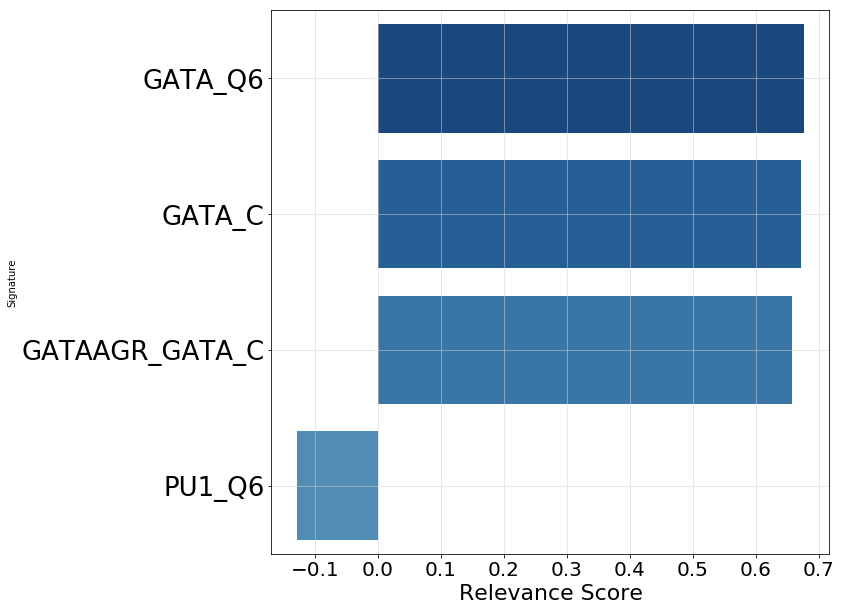

Top_TF : ['GATA_Q6', 'GATA_C', 'GATAAGR_GATA_C', 'PU1_Q6']
Worse_TF : ['GATA_Q6', 'GATA_C', 'GATAAGR_GATA_C', 'PU1_Q6']


In [4]:
dv.rank_plot(result=res1,save=False)

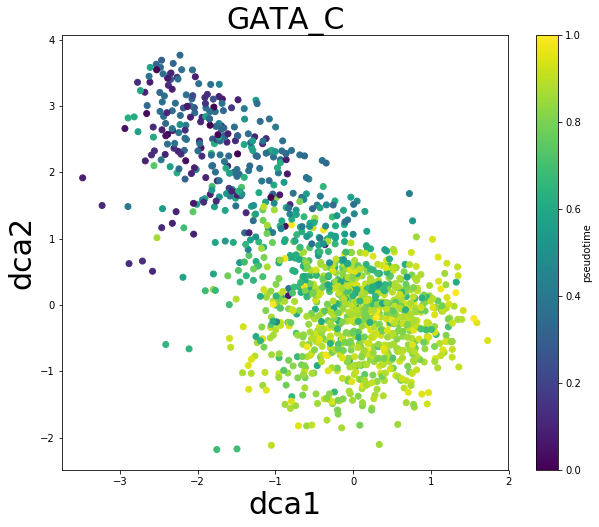

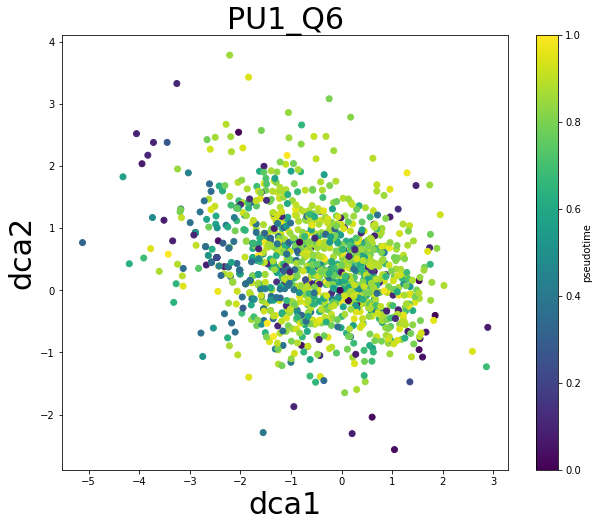

In [5]:
dv.embedding_plot(result=res1, tf_name="GATA_C", pheno=pt1)
dv.embedding_plot(result=res1, tf_name="PU1_Q6", pheno=pt1)

In [9]:
import rpy2.robjects as ro

ro.r('dev.new()')
p=ro.r('curve(sin, -2*pi, 2*pi)')
p

R object with classes: ('list',) mapped to:
<ListVector - Python:0x0000010F78048088 / R:0x0000010F753BDF50>
[FloatVector, FloatVector]
  x: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000010F780480C8 / R:0x0000010F753D75B8>
[-6.283185, -6.157522, -6.031858, -5.906194, ..., 5.906194, 6.031858, 6.157522, 6.283185]
  y: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000010F78048C08 / R:0x0000010F753D7918>
[0.000000, 0.125333, 0.248690, 0.368125, ..., -0.368125, -0.248690, -0.125333, -0.000000]

In [2]:
dv.heatmap()

C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\anndata\core\anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()
Trying to set attribute `.X` of view, making a copy.


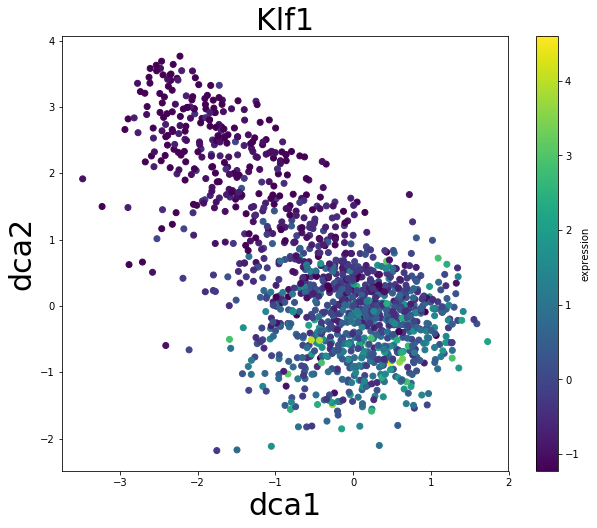

In [6]:
dv.gene_plot(result=res1, tf_name="GATA_C", gene="Klf1", count=count1)

In [ ]:
C3_mouse["GATA_C"]